# Ансамбли моделей машинного обучения.

## Содержание
- Изучение датасета
- Модель Бэггинга
- Модель Бустинга
- Модель Стекинг

#### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_boston
from sklearn.ensemble import BaggingClassifier
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz


#### Загрузка данных

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<AxesSubplot:>

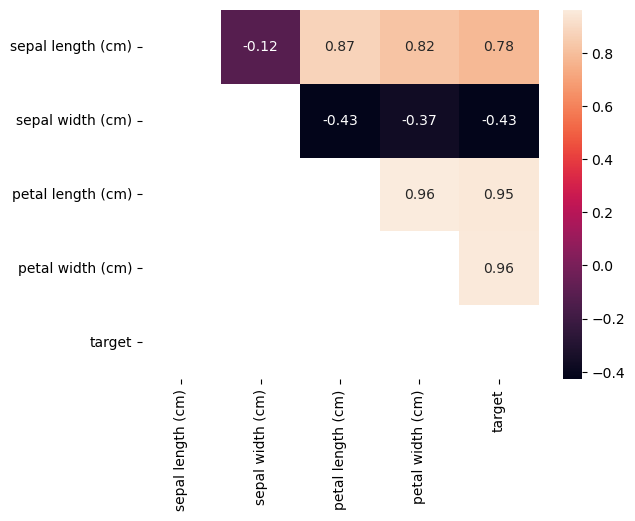

In [4]:
data = df
mask = np.zeros_like(data.corr())
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(method='pearson'), mask=mask, annot=True, fmt='.2f')

In [5]:
# возьмем sepal length и width в качестве Х, У будет целевая метка класса
X = iris.data[:, :2]
Y = iris.target

In [40]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

## Бэггинг

In [6]:
# создаем объект нашего бэггинг классификатора
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
# дадим наши Х и У на обучение
bc1.fit(X, Y)

d:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
d:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [7]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([137, 103, 142, 138,  26, 138,  50, 126,  67,  34,  24,  43, 149,
         58, 112, 118, 104,  46, 104,  27,  74, 147,  37,  45, 132,  44,
        142,  69,  74,  23, 108,  64,   0,  50,  78,  42, 112,  77,  50,
          4, 114,  14,  56, 105,  43,  39,  43, 139,  80, 127, 116,  56,
         54, 110, 138, 136,   4,  79,  62,  44,  60, 111,  74, 114, 125,
        137, 102,  88,  14, 130, 107, 110, 118,  41,  62,  66,  37,  14,
         52, 120, 117,  68,  73,  39, 104,  92,  44, 139,  22,  66, 107,
         27,  85,  54,  40, 146,  95,  38,  92,  97,  61, 116,  73, 116,
         68,  48,  20, 124,  82,  37,  58, 101,   7, 123, 141, 146,  38,
        116, 105,  91,   7,   0, 131,   3,  22,  59, 133,  20, 106, 123,
         11, 121,  66,  18,  46,  52, 147,  62,  89,  86,  37, 115, 132,
         38,  90,  84,  86,  25,  48,  77]),
 array([ 95,  46,  93, 129,  44, 136,  87, 149,  61,  68,  87, 102,  31,
         34,  17,  58,  38,  79, 149,  88,  70,  22,  88, 112, 115,  52,
      

In [8]:
# Соберем бинарную матрицу всей выборки, где
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, X.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 1., 1., 0.,

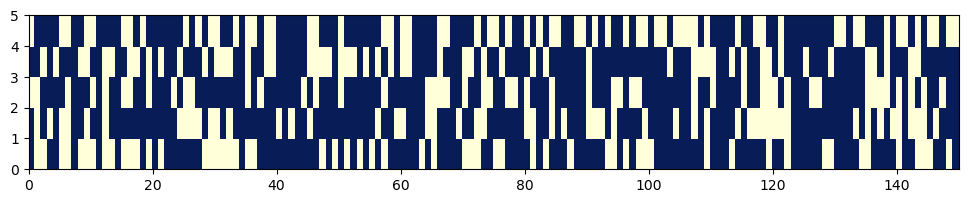

In [9]:
# Визуализируем эту матрицу(синие - попавшие), в теории у нас примерно 37% данных должно не попасть в выборки
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [10]:
# Посмотрим Out-of-bag error для каждой модели
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 38.0%
Для модели № 2 размер OOB составляет 35.33%
Для модели № 3 размер OOB составляет 33.33%
Для модели № 4 размер OOB составляет 36.67%
Для модели № 5 размер OOB составляет 42.67%


In [11]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.6933333333333334, 0.30666666666666664)

In [12]:
# метод oob_decision_function_ даст нам матрицу вероятностей
# принадлежности объекта к классам на основе oob
# у нас 3 класса в У(0, 1, 2), 
# звозвращает nan, если недостаточная выборка
bc1.oob_decision_function_[55:70]

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [       nan,        nan,        nan],
       [0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 1.        , 0.        ],
       [0.        , 0.25      , 0.75      ],
       [       nan,        nan,        nan],
       [0.        , 0.        , 1.        ]])

In [13]:
#выведем одно из деревьев решений
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(bc1.estimators_[0], feature_names=list(iris.feature_names[:2]))
HTML('<pre>' + tree_rules + '</pre>')

Визуализация итогов

In [1]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X, Y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

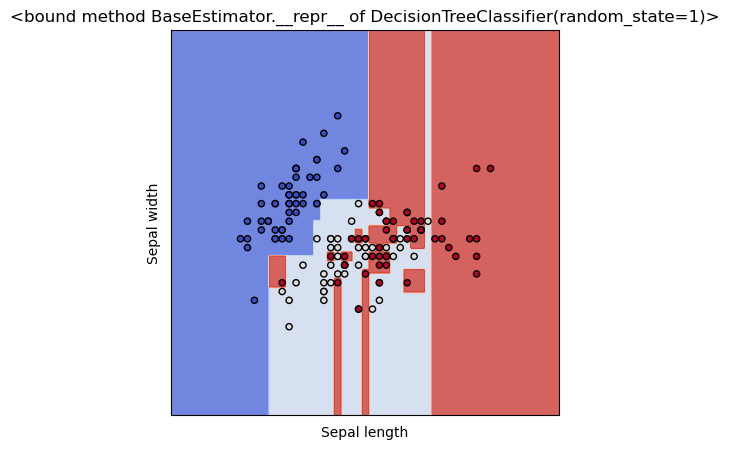

In [15]:
plot_cl(DecisionTreeClassifier(random_state=1))

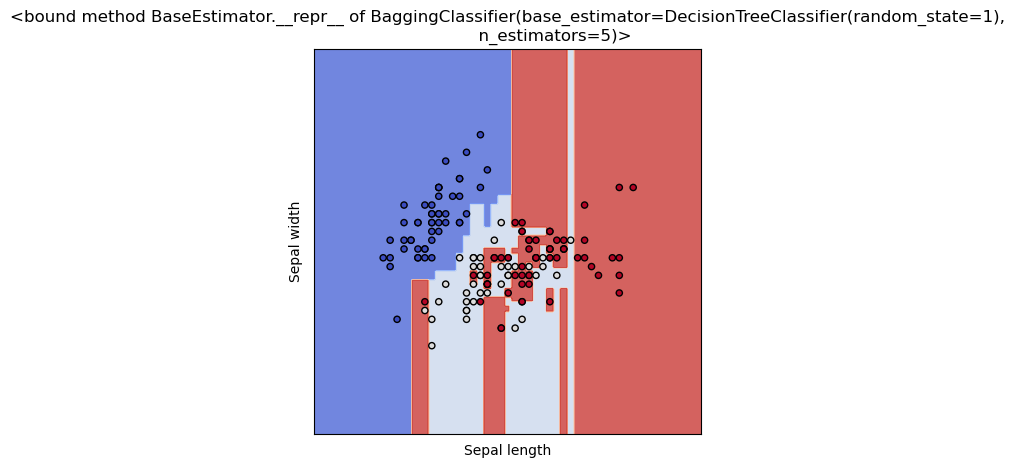

In [16]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=5))

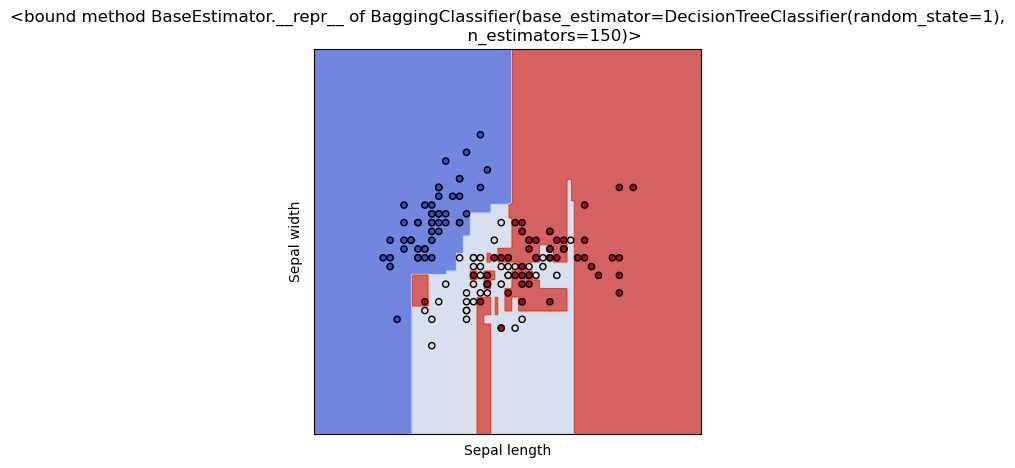

In [17]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=150))

In [56]:
iris_adc_cl = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=150)
iris_adc_cl.fit(X, Y)
iris_adc_cl.score(X, Y)

0.9266666666666666

## Бустинг

Учитывая особенности метода бустинга(быстрое переобучение), ограничим входные данные, возьмем признаки с меньшей корреляцией чем давали модели в бэггинге. Корреляция между Sepal Length и нашим Target'ом равна 0.78, возьмем их.

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [20]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [24]:
iris_X = iris.data[:, :1] # sepal Length
iris_y = iris.target
iris_X[:10]

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9]])

In [25]:
# Обучим классификатор на 5 деревьях
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(iris_X, iris_y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

In [30]:
#выведем деревья решений
tree_rules = export_text(ab1.estimators_[0], feature_names=list(iris.feature_names[:1]))
HTML('<pre>' + tree_rules + '</pre>')

In [31]:
tree_rules = export_text(ab1.estimators_[1], feature_names=list(iris.feature_names[:1]))
HTML('<pre>' + tree_rules + '</pre>')

In [32]:
tree_rules = export_text(ab1.estimators_[2], feature_names=list(iris.feature_names[:1]))
HTML('<pre>' + tree_rules + '</pre>')

In [33]:
tree_rules = export_text(ab1.estimators_[3], feature_names=list(iris.feature_names[:1]))
HTML('<pre>' + tree_rules + '</pre>')

In [34]:
tree_rules = export_text(ab1.estimators_[4], feature_names=list(iris.feature_names[:1]))
HTML('<pre>' + tree_rules + '</pre>')

In [35]:
# посмотрим вес деревьев
ab1.estimator_weights_

array([1.21109027, 1.46251439, 1.11609981, 0.9576204 , 0.71442709])

In [38]:
# выведем нашу матрицу D
df1 = ab1.decision_function(iris_X)
df1[:10]

array([[0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ],
       [0.6648462, 0.3351538, 0.       ]])

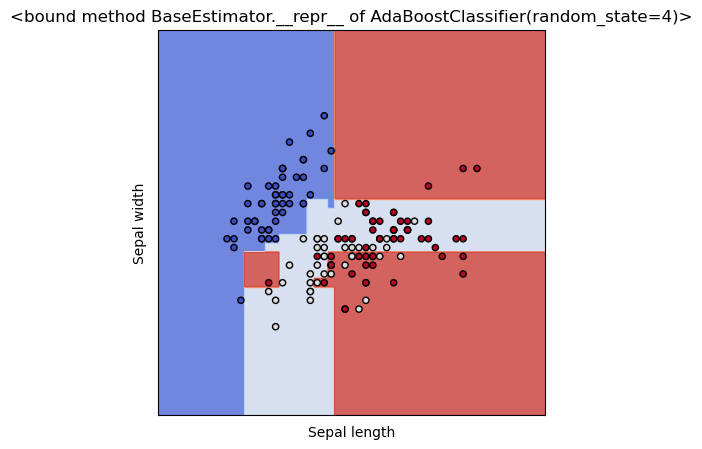

In [44]:
# Результаты классификации
plot_cl(AdaBoostClassifier(random_state=1))

In [52]:
iris_adc_cl = AdaBoostClassifier(random_state=1)
iris_adc_cl.fit(iris_X, iris.target)
iris_adc_cl.score(iris_X, iris.target)

0.7133333333333334

### Градиентный бустинг

In [46]:
# реализация sklearn далеко не самая эффективная, но попробуем её
from sklearn.ensemble import GradientBoostingClassifier

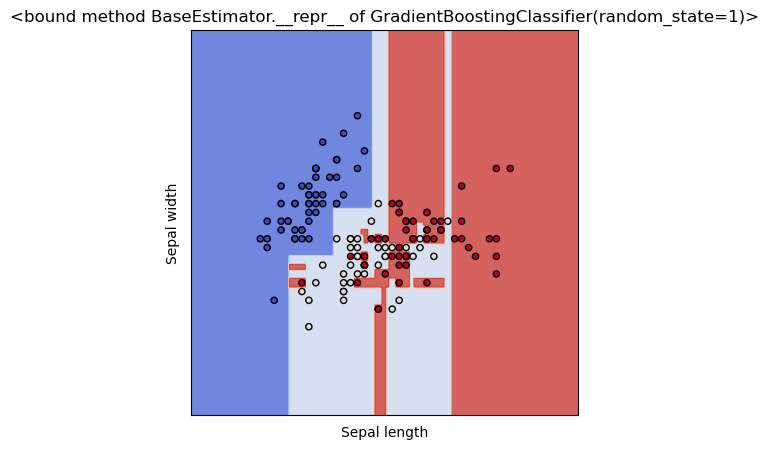

In [47]:
plot_cl(GradientBoostingClassifier(random_state=1))

In [51]:
iris_gb_cl = GradientBoostingClassifier(random_state=1)
iris_gb_cl.fit(iris_X, iris.target)
iris_gb_cl.score(iris_X, iris.target)

0.7666666666666667

## Стекинг

Будем использовать реализацию из библеотеки heamy

In [63]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [59]:
boston = load_boston()
boston_X, boston_y = boston['data'], boston['target']
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston_X, boston_y, test_size=0.2, random_state=1)

d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [64]:
# Функция средней абсолютной ошибки для поданной функции
def val_mae(model):
    model.fit(boston_X_train, boston_y_train)
    y_pred = model.predict(boston_X_test)
    result = mean_absolute_error(boston_y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))  

# Точность для каждой модели отдельно 
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=3.750712180838907

DecisionTreeRegressor()
MAE=3.2598039215686274

RandomForestRegressor(n_estimators=50)
MAE=2.359176470588236



In [66]:
# Используем библиотеку heamy
# создадим датасет для стекинга моделей
dataset = Dataset(boston_X_train, boston_y_train, boston_X_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [67]:
# Слабыми моделями будут две модели: дерево и линейная регрессия
# Мета-учеником: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# Мета-ученик
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [2.0740301288350884, 2.251586826490212, 2.43369736341217, 3.1056886716539083, 2.9392665702366783, 2.7349683704043612, 2.7192053283807445, 2.244892853555618, 2.5614384884208277, 3.078333917633334]
Mean accuracy: 2.614310851902294
Standard Deviation: 0.3439891319497731
Variance: 0.11832852289955839


d:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

In [70]:
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [2.23890243902439, 2.383463414634145, 2.509804878048778, 3.6100243902439018, 3.0596500000000013, 2.395125000000003, 2.3975249999999995, 2.5113749999999984, 2.455824999999998, 2.511175000000003]
Mean accuracy: 2.6072870121951217
Standard Deviation: 0.39189433274971985
Variance: 0.15358116804134814


In [71]:
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [1.715637842769828, 2.1179047782632767, 2.042494219575248, 3.22587972677468, 2.480589701481333, 2.2980496015955465, 2.400944718252293, 2.2231539914055305, 2.049275257674604, 2.3891589083120244]
Mean accuracy: 2.2943088746104365
Standard Deviation: 0.3764837584498279
Variance: 0.14174002037650835


In [72]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [2.146463414634145, 2.5180731707317054, 2.370658536585363, 3.285780487804878, 2.679325, 2.134899999999998, 2.2777499999999997, 2.439224999999999, 2.2614500000000013, 2.370250000000001]
Mean accuracy: 2.448387560975609
Standard Deviation: 0.32017835670061995
Variance: 0.10251418009950941


In [73]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

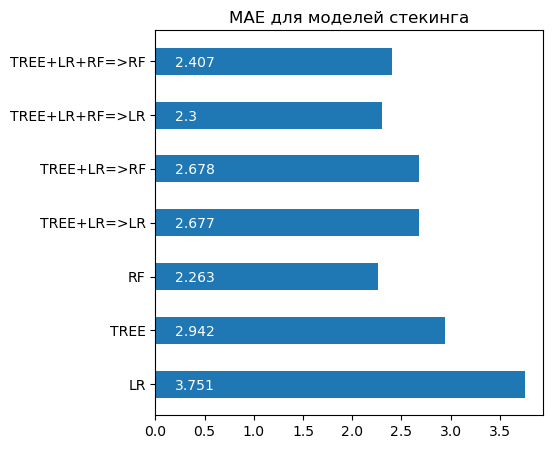

In [74]:
# Результаты
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR', 
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']
array_mae = [3.7507121808389168, 2.942156862745098, 2.263039215686275, 
             2.6766504031924305, 2.6775473780487804, 2.2998386142710823, 
             2.406510426829268]
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')